In [1]:
# CSCE590 - Project Codebook (Electric Vehicles)
# This file was written by James Thompson.

In [2]:
# Importing modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Reading data: atmosphericCO2.csv
atmo = pd.read_csv("CSCE590 Data/atmosphericCO2.csv", index_col="Year")

In [4]:
# Reading data: emissionsUK.csv
emi = pd.read_csv("CSCE590 Data/emissionsUK.csv", index_col="Manufacturer")

In [5]:
# Reading data: evPop.csv
evp = pd.read_csv("CSCE590 Data/evPop.csv", index_col="VIN (1-10)")

In [6]:
# Reading data: transportCO2.csv
trsp = pd.read_csv("CSCE590 Data/transportCO2.csv", index_col="Category")

In [7]:
# Part I: Predicting the future...how CO2 continues to rise.

In [8]:
# Creating fixed data for Part I: averaging CO2 measurements by the year
atmoF = atmo.rename(columns={"Carbon Dioxide (ppm)": "CO2ppm"})
atmoF = atmoF.groupby("Year").CO2ppm.mean()
atmoF.head().to_frame()

,CO2ppm
Year,
1958,315.330000
1959,315.981667
1960,316.908333
1961,317.645000
1962,318.453333


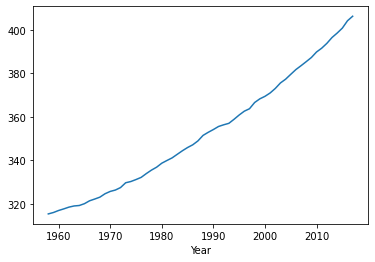

In [9]:
# Plotting data for Part I: CO2 in the atmosphere over the years provided.
atmoF.plot(y="CO2ppm", x="Year")
plt.savefig("atmoF_plot.png")

In [10]:
# Creating fixed data for Part I: transportCO2.csv as it relates to cars ONLY.
trspF = pd.read_csv("CSCE590 Data/transportCO2F.csv")
trspF = trspF.rename(columns = {"CO2 emissions (in millions of tons)": "CO2em"})
trspF.head()

,Year,CO2em
0,1990,5.947
1,1991,6.020
2,1992,6.228
3,1993,6.498
4,1994,6.688


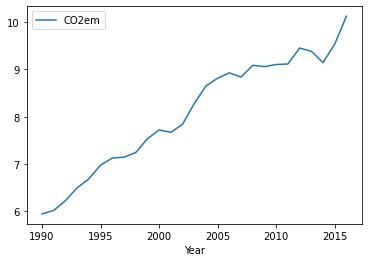

In [11]:
# Plotting data for Part I: CO2 emissions by cars over the years provided.
trspF.plot(x="Year",y="CO2em")
plt.savefig("trspF_plot.png")

In [12]:
# Part II: Electric vehicles: a possible solution?
# Showing off EV data in various forms.

emiFTypes = emi["Fuel Type"].value_counts()
emiFTypes.to_frame()

,Fuel Type
Diesel,2560
Petrol,2379
Petrol Hybrid,73
Electricity / Petrol,45
Electricity,30
Diesel Electric,16
Petrol Electric,9
Electricity / Diesel,6


In [13]:
# And the above in percentage-distribution form...

emiFTypesP = emi["Fuel Type"].value_counts(normalize=True)
emiFTypesP.to_frame()

,Fuel Type
Diesel,0.500195
Petrol,0.464830
Petrol Hybrid,0.014263
Electricity / Petrol,0.008792
Electricity,0.005862
Diesel Electric,0.003126
Petrol Electric,0.001758
Electricity / Diesel,0.001172


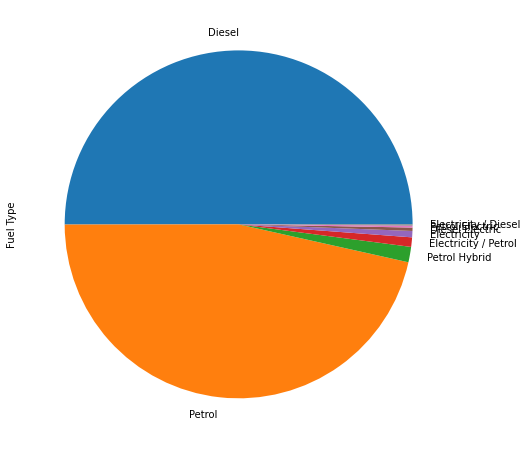

In [14]:
# Pie graph of the distribution of different fuel types in the population.

emiFTypes.plot.pie(figsize = (12,8))
plt.savefig("emiFTypes_pie.png")

In [15]:
# Summed-up values of CO emissions per fuel type.

emiByFT = emi.groupby("Fuel Type")["Emissions CO [mg/km]"].sum()
emiByFT.to_frame()

,Emissions CO [mg/km]
Fuel Type,
Diesel,502418.0
Diesel Electric,4341.0
Electricity,0.0
Electricity / Diesel,146.0
Electricity / Petrol,4613.0
Petrol,800473.0
Petrol Electric,3129.0
Petrol Hybrid,12912.0
